In [2]:
import sys
sys.path.insert(0, "../pretrained_classifiers")
sys.path.insert(0, "../")

In [3]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pylab
import numpy as np
import io
import torch.utils.model_zoo as model_zoo
import torch.onnx
from multiprocessing import Pool
from joblib import Parallel, delayed
import _thread as thread
from numba import njit, prange
import time
import itertools
import torch
from torch.autograd import Variable
from utee import selector
from boxprop import *
from boxprop_optimized import *
%load_ext autoreload
%autoreload 2

In [8]:
num_gpu = 1 if torch.cuda.is_available() else 0

# load the models
from dcgan import Discriminator, Generator

D = Discriminator(ngpu=1).eval()
G = Generator(ngpu=1).eval()

# load weights
D.load_state_dict(torch.load('weights/netD_epoch_99.pth', map_location=torch.device('cpu')))
G.load_state_dict(torch.load('weights/netG_epoch_99.pth', map_location=torch.device('cpu')))
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

# generate some images

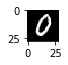

In [9]:
batch_size = 1
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)



# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fi = fake_images_np
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 6, 6
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()

# run discriminator

In [6]:
outputs = D(fake_images)
print(outputs)

tensor([0.0420], grad_fn=<SqueezeBackward1>)


In [8]:
#boxprop_optimized for mnist GAN



0
0.1921790010528639
1
0.349950019037351
2
0.7444940080167726
3
1.3275262510869652
3
0.0011462719412520528
4


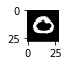

tensor([0.0420], grad_fn=<SqueezeBackward1>)


In [10]:
fake_images_np = a_o.upper
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 6, 6
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()
print(D(torch.Tensor(a_o.upper)))

In [5]:
model_raw, ds_fetcher, is_imagenet = selector.select('mnist')
# ds_val = ds_fetcher(batch_size=10, train=False, val=True)
# for idx, (data, target) in enumerate(ds_val):
#     data =  Variable(torch.FloatTensor(data))
#     output = model_raw(data)
#     print(D(data))


Building and initializing mnist parameters
Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (relu2): ReLU()
  (drop2): Dropout(p=0.2, inplace=False)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


In [6]:
model_raw.eval()

MLP(
  (model): Sequential(
    (fc1): Linear(in_features=784, out_features=256, bias=True)
    (relu1): ReLU()
    (drop1): Dropout(p=0.2, inplace=False)
    (fc2): Linear(in_features=256, out_features=256, bias=True)
    (relu2): ReLU()
    (drop2): Dropout(p=0.2, inplace=False)
    (out): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [92]:
torch.manual_seed(0)
center = torch.randn(1,100,1,1)

In [186]:
# center = torch.randn(1,100,1,1)
size=0.05
upper_bound = center+size
lower_bound = center-size
a_o = Box_o(upper_bound,lower_bound, False)

size=0.001
upper_bound = center+size
lower_bound = center-size
a_oo = Box_o(upper_bound,lower_bound, False)

print(False in (a_oo.upper==a_o.upper),1)

a_o.convTranspose2d(weight=G.state_dict()['main.0.weight'], c_out=512, kernel_size=4, stride=1, padding=0, output_padding=0)
a_oo.convTranspose2d(weight=G.state_dict()['main.0.weight'], c_out=512, kernel_size=4, stride=1, padding=0, output_padding=0)
print(False in (a_oo.upper==a_o.upper),2)

a_o.batchNorm2d(mean=G.state_dict()['main.1.running_mean'], var=G.state_dict()['main.1.running_var'], eps=1e-05, weight=G.state_dict()['main.1.weight'], bias=G.state_dict()['main.1.bias'])
a_oo.batchNorm2d(mean=G.state_dict()['main.1.running_mean'], var=G.state_dict()['main.1.running_var'], eps=1e-05, weight=G.state_dict()['main.1.weight'], bias=G.state_dict()['main.1.bias'])
print(False in (a_oo.upper==a_o.upper),3)

a_o.relu()
a_oo.relu()
print(False in (a_oo.upper==a_o.upper),4)

a_o.convTranspose2d(weight=G.state_dict()['main.3.weight'], c_out=256, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.convTranspose2d(weight=G.state_dict()['main.3.weight'], c_out=256, kernel_size=4, stride=2, padding=1, output_padding=0)
print(False in (a_oo.upper==a_o.upper),5)

a_o.batchNorm2d(mean=G.state_dict()['main.4.running_mean'], var=G.state_dict()['main.4.running_var'], eps=1e-05, weight=G.state_dict()['main.4.weight'], bias=G.state_dict()['main.4.bias'])
a_oo.batchNorm2d(mean=G.state_dict()['main.4.running_mean'], var=G.state_dict()['main.4.running_var'], eps=1e-05, weight=G.state_dict()['main.4.weight'], bias=G.state_dict()['main.4.bias'])
print(False in (a_oo.upper==a_o.upper),6)

a_o.relu()
a_oo.relu()
print(False in (a_oo.upper==a_o.upper),7)

a_o.convTranspose2d(weight=G.state_dict()['main.6.weight'], c_out=128, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.convTranspose2d(weight=G.state_dict()['main.6.weight'], c_out=128, kernel_size=4, stride=2, padding=1, output_padding=0)
print(False in (a_oo.upper==a_o.upper),8)

a_o.batchNorm2d(mean=G.state_dict()['main.7.running_mean'], var=G.state_dict()['main.7.running_var'], eps=1e-05, weight=G.state_dict()['main.7.weight'], bias=G.state_dict()['main.7.bias'])
a_oo.batchNorm2d(mean=G.state_dict()['main.7.running_mean'], var=G.state_dict()['main.7.running_var'], eps=1e-05, weight=G.state_dict()['main.7.weight'], bias=G.state_dict()['main.7.bias'])
print(False in (a_oo.upper==a_o.upper),9)

a_o.relu()
a_oo.relu()
print(False in (a_oo.upper==a_o.upper),10)

a_o.convTranspose2d(weight=G.state_dict()['main.9.weight'], c_out=64, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.convTranspose2d(weight=G.state_dict()['main.9.weight'], c_out=64, kernel_size=4, stride=2, padding=1, output_padding=0)
print(False in (a_oo.upper==a_o.upper),11)

a_o.batchNorm2d(mean=G.state_dict()['main.10.running_mean'], var=G.state_dict()['main.10.running_var'], eps=1e-05, weight=G.state_dict()['main.10.weight'], bias=G.state_dict()['main.10.bias'])
a_oo.batchNorm2d(mean=G.state_dict()['main.10.running_mean'], var=G.state_dict()['main.10.running_var'], eps=1e-05, weight=G.state_dict()['main.10.weight'], bias=G.state_dict()['main.10.bias'])
print(False in (a_oo.upper==a_o.upper),12)

a_o.relu()
a_oo.relu()
print(False in (a_oo.upper==a_o.upper),13)
print(a_o.upper)


a_o.convTranspose2d(weight=G.state_dict()['main.12.weight'], c_out=1, kernel_size=1, stride=1, padding=2, output_padding=0)
a_oo.convTranspose2d(weight=G.state_dict()['main.12.weight'], c_out=1, kernel_size=1, stride=1, padding=2, output_padding=0)
print(False in (a_oo.upper==a_o.upper),14)
# print(a_o.lower)
atan = a_o.tanh()
aotan = a_oo.tanh()
print(False in (a_oo.upper==a_o.upper),15)


C = model_raw
b1 = Box_o(a_oo.upper, a_oo.lower, True)
b2 = Box_o(a_o.upper, a_o.lower, True)
print(False in (b1.lip.upper==b2.lip.upper))
b1.linear(C.state_dict()['model.fc1.weight'], C.state_dict()['model.fc1.bias'])
b2.linear(C.state_dict()['model.fc1.weight'], C.state_dict()['model.fc1.bias'])
print(False in (b1.lip.upper==b2.lip.upper))
print(b1.relu()==b2.relu())
print(False in (b1.lip.upper==b2.lip.upper))
b1.linear(C.state_dict()['model.fc2.weight'], C.state_dict()['model.fc2.bias'])
b2.linear(C.state_dict()['model.fc2.weight'], C.state_dict()['model.fc2.bias'])
print(False in (b1.lip.upper==b2.lip.upper))
print(b1.relu()==b2.relu())

print(False in (b1.lip.upper==b2.lip.upper))
b1.linear(C.state_dict()['model.out.weight'], C.state_dict()['model.out.bias'])
b2.linear(C.state_dict()['model.out.weight'], C.state_dict()['model.out.bias'])
print(False in (b1.lip.upper==b2.lip.upper))






True 1
True 2
True 3
True 4
True 5
True 6
True 7
True 8
True 9
True 10
True 11
True 12
True 13
tensor([[[[ 22.1732,  87.9016,  65.2818,  ...,  69.9947,  48.1911,  22.6203],
          [ 69.8355, 273.7919, 212.5612,  ..., 225.5994, 160.8569,  72.1978],
          [ 71.2584, 276.8326, 214.6486,  ..., 221.8024, 165.5772,  70.0158],
          ...,
          [ 73.4504, 254.9062, 223.1740,  ..., 291.0572, 236.8167,  96.5797],
          [ 65.2499, 234.9788, 200.7440,  ..., 255.7771, 209.9358,  83.3470],
          [ 24.0215,  78.4734,  74.1868,  ...,  91.0343,  80.1353,  30.9065]],

         [[ 31.0545, 115.5600,  85.6173,  ...,  99.6764,  58.9167,  35.5789],
          [143.8479, 240.7022, 388.4092,  ..., 208.9616, 246.3153,  71.2211],
          [ 94.9811, 331.2182, 267.5133,  ..., 289.9214, 186.8287,  97.9906],
          ...,
          [145.2797, 259.7335, 394.7720,  ..., 321.9141, 352.5579, 112.5001],
          [ 82.1302, 252.7834, 230.0679,  ..., 293.4373, 214.7978,  99.4312],
          [ 47.

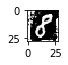

tensor([0.0874], grad_fn=<SqueezeBackward1>)


In [180]:
fake_images_np = a_oo.upper
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 6, 6
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()
print(D(torch.Tensor(a_o.upper)))

In [181]:
b1.getLip()

115.42352

In [ ]:
115.42352

In [59]:
import time, cProfile
torch.manual_seed(0)
center = torch.randn(1,100,1,1)

In [99]:
C = model_raw

size=0.1
upper_bound = center+size
lower_bound = center-size
tic = time.perf_counter()

a_o = Box_o(upper_bound,lower_bound, False)

a_o.convTranspose2d(weight=G.state_dict()['main.0.weight'], c_out=512, kernel_size=4, stride=1, padding=0, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.1.running_mean'], var=G.state_dict()['main.1.running_var'], eps=1e-05, weight=G.state_dict()['main.1.weight'], bias=G.state_dict()['main.1.bias'])
a_o.relu()
a_o.convTranspose2d(weight=G.state_dict()['main.3.weight'], c_out=256, kernel_size=4, stride=2, padding=1, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.4.running_mean'], var=G.state_dict()['main.4.running_var'], eps=1e-05, weight=G.state_dict()['main.4.weight'], bias=G.state_dict()['main.4.bias'])
a_o.relu()
a_o.convTranspose2d(weight=G.state_dict()['main.6.weight'], c_out=128, kernel_size=4, stride=2, padding=1, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.7.running_mean'], var=G.state_dict()['main.7.running_var'], eps=1e-05, weight=G.state_dict()['main.7.weight'], bias=G.state_dict()['main.7.bias'])
cProfile.run('a_o.relu()')
a_o.convTranspose2d(weight=G.state_dict()['main.9.weight'], c_out=64, kernel_size=4, stride=2, padding=1, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.10.running_mean'], var=G.state_dict()['main.10.running_var'], eps=1e-05, weight=G.state_dict()['main.10.weight'], bias=G.state_dict()['main.10.bias'])
print(len(a_o.relu()))
a_o.convTranspose2d(weight=G.state_dict()['main.12.weight'], c_out=1, kernel_size=1, stride=1, padding=2, output_padding=0)
a_o.tanh()

# b1 = Box_o(a_o.upper, a_o.lower, True)
# b1.linear(C.state_dict()['model.fc1.weight'], C.state_dict()['model.fc1.bias'])
# b1.relu()
# b1.linear(C.state_dict()['model.fc2.weight'], C.state_dict()['model.fc2.bias'])
# b1.relu()
# b1.linear(C.state_dict()['model.out.weight'], C.state_dict()['model.out.bias'])

print(time.perf_counter()-tic)



size=0.00001
upper_bound = center+size
lower_bound = center-size

tic = time.perf_counter()

a_oo = Box_o(upper_bound,lower_bound, False)

a_oo.convTranspose2d(weight=G.state_dict()['main.0.weight'], c_out=512, kernel_size=4, stride=1, padding=0, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.1.running_mean'], var=G.state_dict()['main.1.running_var'], eps=1e-05, weight=G.state_dict()['main.1.weight'], bias=G.state_dict()['main.1.bias'])
a_oo.relu()
a_oo.convTranspose2d(weight=G.state_dict()['main.3.weight'], c_out=256, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.4.running_mean'], var=G.state_dict()['main.4.running_var'], eps=1e-05, weight=G.state_dict()['main.4.weight'], bias=G.state_dict()['main.4.bias'])
a_oo.relu()
a_oo.convTranspose2d(weight=G.state_dict()['main.6.weight'], c_out=128, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.7.running_mean'], var=G.state_dict()['main.7.running_var'], eps=1e-05, weight=G.state_dict()['main.7.weight'], bias=G.state_dict()['main.7.bias'])
cProfile.run('a_oo.relu()')
a_oo.convTranspose2d(weight=G.state_dict()['main.9.weight'], c_out=64, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.10.running_mean'], var=G.state_dict()['main.10.running_var'], eps=1e-05, weight=G.state_dict()['main.10.weight'], bias=G.state_dict()['main.10.bias'])
print(len(a_oo.relu()))
a_oo.convTranspose2d(weight=G.state_dict()['main.12.weight'], c_out=1, kernel_size=1, stride=1, padding=2, output_padding=0)
a_oo.tanh()

# b2 = Box_o(a_oo.upper, a_oo.lower, True)
# b2.linear(C.state_dict()['model.fc1.weight'], C.state_dict()['model.fc1.bias'])
# b2.relu()
# b2.linear(C.state_dict()['model.fc2.weight'], C.state_dict()['model.fc2.bias'])
# b2.relu()
# b2.linear(C.state_dict()['model.out.weight'], C.state_dict()['model.out.bias'])

print(time.perf_counter()-tic)

         98341 function calls (98339 primitive calls) in 0.835 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(prod)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(product)
        1    0.000    0.000    0.835    0.835 <string>:1(<module>)
        1    0.474    0.474    0.835    0.835 boxprop_optimized.py:53(relu)
        4    0.000    0.000    0.000    0.000 fromnumeric.py:2838(_prod_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2843(prod)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:3602(product)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:73(_wrapreduction)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:74(<dictcomp>)
    65536    0.357    0.000    0.357    0.000 tensor.py:25(wrapped)
        1    0.000    0.000    0.000    0.000 tensor.py

In [12]:
import time, cProfile
torch.manual_seed(0)
center = torch.randn(1,100,1,1)

C = model_raw

size=0.1
upper_bound = center+size
lower_bound = center-size
tic = time.perf_counter()

a_o = Box_o(upper_bound,lower_bound, False)

a_o.convTranspose2d(weight=G.state_dict()['main.0.weight'], c_out=512, kernel_size=4, stride=1, padding=0, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.1.running_mean'], var=G.state_dict()['main.1.running_var'], eps=1e-05, weight=G.state_dict()['main.1.weight'], bias=G.state_dict()['main.1.bias'])
a_o.relu()
a_o.convTranspose2d(weight=G.state_dict()['main.3.weight'], c_out=256, kernel_size=4, stride=2, padding=1, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.4.running_mean'], var=G.state_dict()['main.4.running_var'], eps=1e-05, weight=G.state_dict()['main.4.weight'], bias=G.state_dict()['main.4.bias'])
a_o.relu()
a_o.convTranspose2d(weight=G.state_dict()['main.6.weight'], c_out=128, kernel_size=4, stride=2, padding=1, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.7.running_mean'], var=G.state_dict()['main.7.running_var'], eps=1e-05, weight=G.state_dict()['main.7.weight'], bias=G.state_dict()['main.7.bias'])
cProfile.run('a_o.relu()')
a_o.convTranspose2d(weight=G.state_dict()['main.9.weight'], c_out=64, kernel_size=4, stride=2, padding=1, output_padding=0)
a_o.batchNorm2d(mean=G.state_dict()['main.10.running_mean'], var=G.state_dict()['main.10.running_var'], eps=1e-05, weight=G.state_dict()['main.10.weight'], bias=G.state_dict()['main.10.bias'])
print(len(a_o.relu()))
a_o.convTranspose2d(weight=G.state_dict()['main.12.weight'], c_out=1, kernel_size=1, stride=1, padding=2, output_padding=0)
a_o.tanh()

# b1 = Box_o(a_o.upper, a_o.lower, True)
# b1.linear(C.state_dict()['model.fc1.weight'], C.state_dict()['model.fc1.bias'])
# b1.relu()
# b1.linear(C.state_dict()['model.fc2.weight'], C.state_dict()['model.fc2.bias'])
# b1.relu()
# b1.linear(C.state_dict()['model.out.weight'], C.state_dict()['model.out.bias'])

print(time.perf_counter()-tic)



size=0.001
upper_bound = center+size
lower_bound = center-size

tic = time.perf_counter()

a_oo = Box_o(upper_bound,lower_bound, False)

a_oo.convTranspose2d(weight=G.state_dict()['main.0.weight'], c_out=512, kernel_size=4, stride=1, padding=0, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.1.running_mean'], var=G.state_dict()['main.1.running_var'], eps=1e-05, weight=G.state_dict()['main.1.weight'], bias=G.state_dict()['main.1.bias'])
a_oo.relu()
a_oo.convTranspose2d(weight=G.state_dict()['main.3.weight'], c_out=256, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.4.running_mean'], var=G.state_dict()['main.4.running_var'], eps=1e-05, weight=G.state_dict()['main.4.weight'], bias=G.state_dict()['main.4.bias'])
a_oo.relu()
a_oo.convTranspose2d(weight=G.state_dict()['main.6.weight'], c_out=128, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.7.running_mean'], var=G.state_dict()['main.7.running_var'], eps=1e-05, weight=G.state_dict()['main.7.weight'], bias=G.state_dict()['main.7.bias'])
cProfile.run('a_oo.relu()')
a_oo.convTranspose2d(weight=G.state_dict()['main.9.weight'], c_out=64, kernel_size=4, stride=2, padding=1, output_padding=0)
a_oo.batchNorm2d(mean=G.state_dict()['main.10.running_mean'], var=G.state_dict()['main.10.running_var'], eps=1e-05, weight=G.state_dict()['main.10.weight'], bias=G.state_dict()['main.10.bias'])
print(len(a_oo.relu()))
a_oo.convTranspose2d(weight=G.state_dict()['main.12.weight'], c_out=1, kernel_size=1, stride=1, padding=2, output_padding=0)
a_oo.tanh()

# b2 = Box_o(a_oo.upper, a_oo.lower, True)
# b2.linear(C.state_dict()['model.fc1.weight'], C.state_dict()['model.fc1.bias'])
# b2.relu()
# b2.linear(C.state_dict()['model.fc2.weight'], C.state_dict()['model.fc2.bias'])
# b2.relu()
# b2.linear(C.state_dict()['model.out.weight'], C.state_dict()['model.out.bias'])

print(time.perf_counter()-tic)

torch.Size([8192])
torch.Size([16384])
torch.Size([32768])
         98376 function calls (98374 primitive calls) in 0.820 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(prod)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(product)
        1    0.000    0.000    0.820    0.820 <string>:1(<module>)
        1    0.460    0.460    0.820    0.820 boxprop_optimized.py:53(relu)
        4    0.000    0.000    0.000    0.000 fromnumeric.py:2838(_prod_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2843(prod)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:3602(product)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:73(_wrapreduction)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:74(<dictcomp>)
        3    0.000    0.000    0.000    0.000 iostream.py:197(sc